<a href="https://colab.research.google.com/github/Aishaamalik/Mental-Health-Economic-Indicators-Project-/blob/main/PROJECT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health & Economic Indicators Project**

----
----

# 1: DATA EXPLORATION

## 1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## 2: Loading the Data

In [3]:
df = pd.read_csv('survey.csv')


## 3: Dataset Overview

In [6]:
print(" DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

 DATASET OVERVIEW
------------------------------
Dataset shape: (1259, 27)
Number of rows: 1259
Number of columns: 27


## 4: Column Names

In [7]:
print(" COLUMN NAMES")
print("-" * 30)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

 COLUMN NAMES
------------------------------
 1. Timestamp
 2. Age
 3. Gender
 4. Country
 5. state
 6. self_employed
 7. family_history
 8. treatment
 9. work_interfere
10. no_employees
11. remote_work
12. tech_company
13. benefits
14. care_options
15. wellness_program
16. seek_help
17. anonymity
18. leave
19. mental_health_consequence
20. phys_health_consequence
21. coworkers
22. supervisor
23. mental_health_interview
24. phys_health_interview
25. mental_vs_physical
26. obs_consequence
27. comments


## 5: Data Types

In [9]:
print("DATA TYPES")
print("-" * 30)
print(df.dtypes)

DATA TYPES
------------------------------
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments              

## 6: First and last five row display

In [10]:

print("\n FIRST 5 ROWS")
print("-" * 30)
print(df.head())

print("\n LAST 5 ROWS")
print("-" * 30)
print(df.tail())


 FIRST 5 ROWS
------------------------------
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy          

## 7: Numerical Columns Statistics

In [11]:
print("\n NUMERICAL COLUMNS STATISTICS")
print("-" * 30)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if numerical_cols:
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found")


 NUMERICAL COLUMNS STATISTICS
------------------------------
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


## 8: Missing Values Analysis

In [12]:
print("\n MISSING VALUES ANALYSIS")
print("-" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df.to_string(index=False))


 MISSING VALUES ANALYSIS
------------------------------
        Column  Missing_Count  Missing_Percentage
      comments           1095           86.973789
         state            515           40.905481
work_interfere            264           20.969023
 self_employed             18            1.429706


## 9: Unique Values Count


In [ ]:
print("\n UNIQUE VALUES COUNT")
print("-" * 30)
unique_counts = df.nunique().sort_values(ascending=False)
for col, count in unique_counts.items():
    print(f"{col}: {count} unique values")

## 10:  Key Categorical Variables Distribution

In [13]:
print("\n KEY CATEGORICAL VARIABLES DISTRIBUTION")
print("-" * 30)

key_columns = ['Age', 'Gender', 'Country', 'treatment', 'work_interfere',
               'family_history', 'self_employed', 'tech_company', 'remote_work']

for col in key_columns:
    if col in df.columns:
        print(f"\n{col.upper()} Distribution:")
        value_counts = df[col].value_counts()
        print(value_counts.head(10))
        print(f"Total unique values: {df[col].nunique()}")


 KEY CATEGORICAL VARIABLES DISTRIBUTION
------------------------------

AGE Distribution:
Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
Name: count, dtype: int64
Total unique values: 53

GENDER Distribution:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64
Total unique values: 49

COUNTRY Distribution:
Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64
Total unique values: 48

TREATMENT Distribution:
treatment
Yes    637
No     622
Name: count, dtype: int64
Total unique values: 2

WORK_INTERFERE Distribution:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


## 11: Age Analysis

In [14]:
if 'Age' in df.columns:
    try:
        age_numeric = pd.to_numeric(df['Age'], errors='coerce')
        print(f"\nAGE STATISTICS:")
        print(f"Mean age: {age_numeric.mean():.2f}")
        print(f"Median age: {age_numeric.median():.2f}")
        print(f"Min age: {age_numeric.min()}")
        print(f"Max age: {age_numeric.max()}")
        print(f"Standard deviation: {age_numeric.std():.2f}")
    except:
        print("\nAge column contains non-numeric values")


AGE STATISTICS:
Mean age: 79428148.31
Median age: 31.00
Min age: -1726
Max age: 99999999999
Standard deviation: 2818299442.98


## 12: Treatment Analysis

In [16]:
if 'treatment' in df.columns:
    print(f"\n TREATMENT ANALYSIS")
    print("-" * 30)
    treatment_counts = df['treatment'].value_counts()
    print("Treatment distribution:")
    print(treatment_counts)
    print(f"\nTreatment percentage:")
    print((treatment_counts / len(df) * 100).round(2))


 TREATMENT ANALYSIS
------------------------------
Treatment distribution:
treatment
Yes    637
No     622
Name: count, dtype: int64

Treatment percentage:
treatment
Yes    50.6
No     49.4
Name: count, dtype: float64


## 13: Gender Analysis

In [17]:
if 'Gender' in df.columns:
    print(f"\n GENDER ANALYSIS")
    print("-" * 30)
    gender_counts = df['Gender'].value_counts()
    print("Gender distribution:")
    print(gender_counts.head(10))


 GENDER ANALYSIS
------------------------------
Gender distribution:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64


## 14: Country Analysis

In [18]:
if 'Country' in df.columns:
    print(f"\n COUNTRY ANALYSIS")
    print("-" * 30)
    country_counts = df['Country'].value_counts()
    print("Top 10 countries:")
    print(country_counts.head(10))


 COUNTRY ANALYSIS
------------------------------
Top 10 countries:
Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64


## 15: Work Interference

In [19]:
if 'work_interfere' in df.columns:
    print(f"\n WORK INTERFERENCE ANALYSIS")
    print("-" * 30)
    work_counts = df['work_interfere'].value_counts()
    print("Work interference distribution:")
    print(work_counts)


 WORK INTERFERENCE ANALYSIS
------------------------------
Work interference distribution:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


## 16: Company Size

In [20]:
if 'no_employees' in df.columns:
    print(f"\n COMPANY SIZE ANALYSIS")
    print("-" * 30)
    company_size_counts = df['no_employees'].value_counts()
    print("Company size distribution:")
    print(company_size_counts)


 COMPANY SIZE ANALYSIS
------------------------------
Company size distribution:
no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64


## 17: Generating Visualizations

### A: Treatment distribution


TREATMENT DISTRIBUTION VISUALIZATION
----------------------------------------

Treatment Data Summary:
treatment
Yes    637
No     622
Name: count, dtype: int64


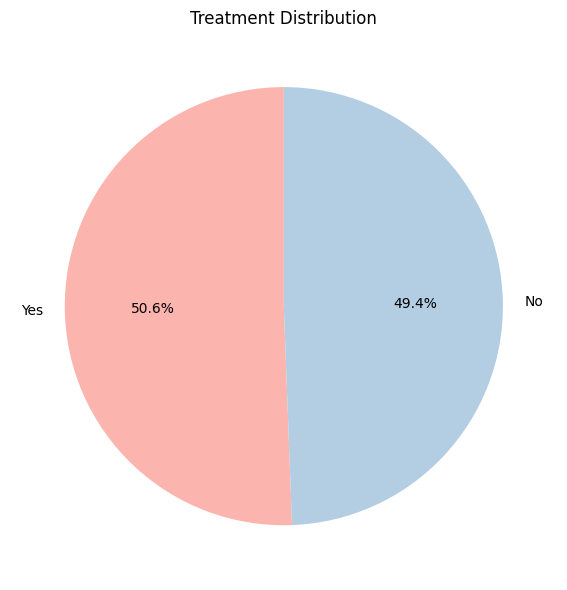

In [31]:

print("\nTREATMENT DISTRIBUTION VISUALIZATION")
print("-" * 40)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(6, 6))

if 'treatment' in df.columns:
    treatment_counts = df['treatment'].value_counts()

    print("\nTreatment Data Summary:")
    print(treatment_counts)

    ax.pie(
        treatment_counts.values,
        labels=treatment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors
    )
    ax.set_title('Treatment Distribution')
else:
    print("\nError: 'treatment' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Treatment column not found', ha='center', va='center')
    ax.set_title('Error: Treatment Data Missing')

plt.tight_layout()
plt.show()


### B: Age Distribution


AGE DISTRIBUTION VISUALIZATION
----------------------------------------

Age Data Summary:
count    1254.000000
mean       32.019139
std         7.375005
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


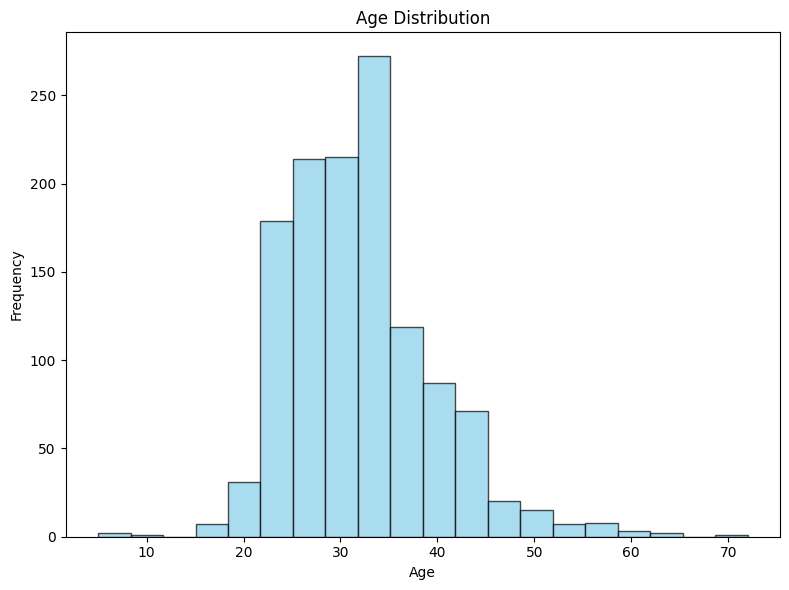

In [33]:

print("\nAGE DISTRIBUTION VISUALIZATION")
print("-" * 40)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'Age' in df.columns:
    try:
        age_numeric = pd.to_numeric(df['Age'], errors='coerce')
        age_cleaned = age_numeric[(age_numeric >= 0) & (age_numeric <= 100)].dropna()

        print("\nAge Data Summary:")
        print(age_cleaned.describe())

        ax.hist(
            age_cleaned,
            bins=20,
            edgecolor='black',
            alpha=0.7,
            color='skyblue'
        )
        ax.set_title('Age Distribution')
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
    except Exception as e:
        print("\nError processing age data:", str(e))
        ax.text(0.5, 0.5, 'Error processing age data', ha='center', va='center')
        ax.set_title('Age Distribution - Error')
else:
    print("\nError: 'Age' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Age column not found', ha='center', va='center')
    ax.set_title('Error: Age Data Missing')

plt.tight_layout()
plt.show()


### C: Gender Distribution


GENDER DISTRIBUTION VISUALIZATION
---------------------------------------------

Top 10 Gender Categories:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64


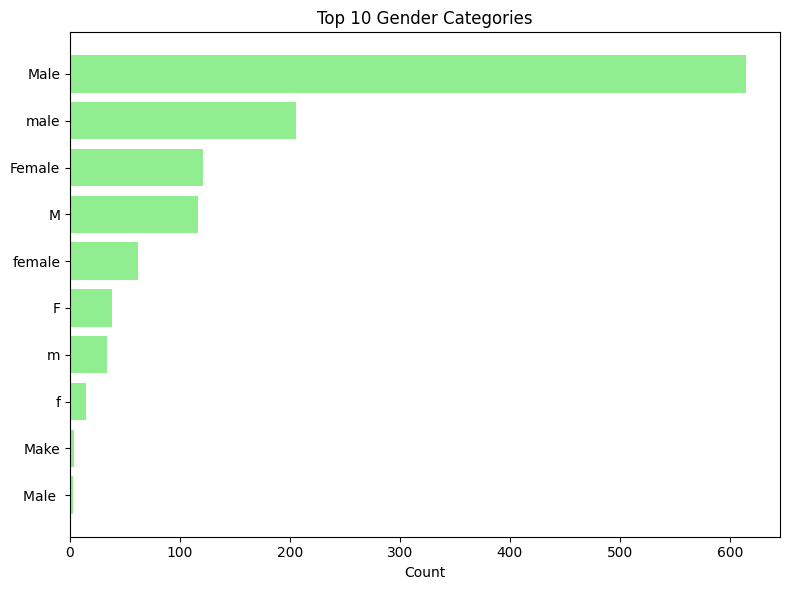

In [34]:

print("\nGENDER DISTRIBUTION VISUALIZATION")
print("-" * 45)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'Gender' in df.columns:
    gender_top10 = df['Gender'].value_counts().head(10)

    print("\nTop 10 Gender Categories:")
    print(gender_top10)

    ax.barh(
        range(len(gender_top10)),
        gender_top10.values,
        color='lightgreen'
    )
    ax.set_yticks(range(len(gender_top10)))
    ax.set_yticklabels(gender_top10.index)
    ax.set_title('Top 10 Gender Categories')
    ax.set_xlabel('Count')
    ax.invert_yaxis()
else:
    print("\nError: 'Gender' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Gender column not found', ha='center', va='center')
    ax.set_title('Error: Gender Data Missing')

plt.tight_layout()
plt.show()


### D:  Work Interference Distribution


WORK INTERFERENCE DISTRIBUTION VISUALIZATION
--------------------------------------------------

Work Interference Data Summary:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


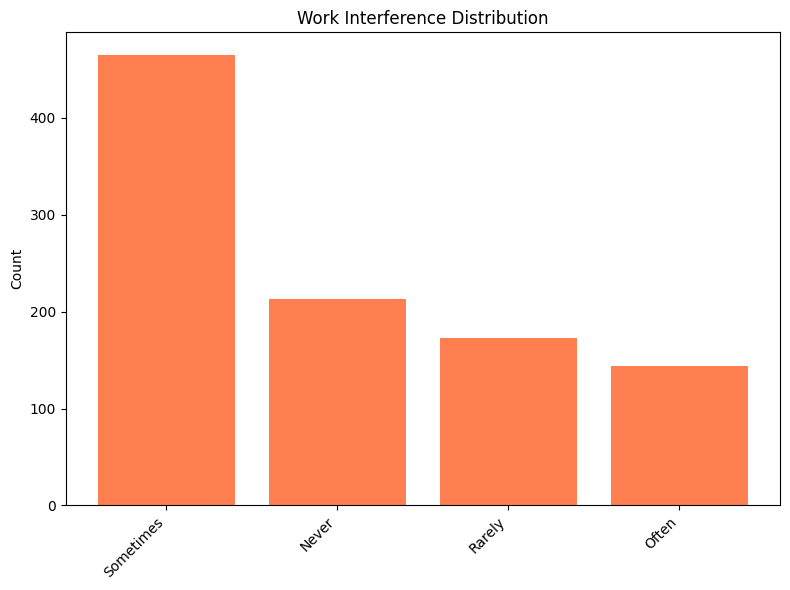

In [35]:

print("\nWORK INTERFERENCE DISTRIBUTION VISUALIZATION")
print("-" * 50)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'work_interfere' in df.columns:
    work_counts = df['work_interfere'].value_counts()

    print("\nWork Interference Data Summary:")
    print(work_counts)

    ax.bar(
        range(len(work_counts)),
        work_counts.values,
        color='coral'
    )
    ax.set_xticks(range(len(work_counts)))
    ax.set_xticklabels(work_counts.index, rotation=45, ha='right')
    ax.set_title('Work Interference Distribution')
    ax.set_ylabel('Count')
else:
    print("\nError: 'work_interfere' column not found in the dataset.")
    ax.text(0.5, 0.5, 'work_interfere column not found', ha='center', va='center')
    ax.set_title('Error: Work Interference Data Missing')

plt.tight_layout()
plt.show()
